# Customer Orders EDA Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Question 1: Load the dataset and print its shape

In [5]:
df = pd.read_csv('kiwilytics_orders.csv')
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset shape: (100, 6)
Rows: 100, Columns: 6


In [6]:
df.head()

,order_id,customer_name,product,quantity,unit_price,order_date
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25
3,4,Raymond,Kiwi Candy,4,NaN,2024-01-04
4,5,David,Kiwi Juice,1,4.5,2024-02-25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       100 non-null    int64  
 1   customer_name  100 non-null    object 
 2   product        100 non-null    object 
 3   quantity       100 non-null    int64  
 4   unit_price     92 non-null     float64
 5   order_date     100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [19]:
df

,order_id,customer_name,product,quantity,unit_price,order_date,total_price
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29,6.0
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08,3.0
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25,2.5
3,4,Raymond,Kiwi Candy,4,2.5,2024-01-04,10.0
4,5,David,Kiwi Juice,1,4.5,2024-02-25,4.5
...,...,...,...,...,...,...,...
95,96,Erin,Kiwi Juice,5,4.5,2024-01-20,22.5
96,97,Michael,Kiwi Candy,2,2.5,2024-01-09,5.0
97,98,Lisa,Kiwi Candy,2,2.5,2024-02-09,5.0
98,99,Justin,Kiwi Juice,1,4.5,2024-01-29,4.5


## Question 2: Fill missing unit_price and calculate total revenue

In [8]:
print(f"Missing unit_price values: {df['unit_price'].isnull().sum()}")
df['unit_price'].isnull().sum()

Missing unit_price values: 8


8

In [9]:
avg_prices = df.groupby('product')['unit_price'].mean()
print("Average prices per product:")
avg_prices

Average prices per product:


product
Kiwi Candy       2.5
Kiwi Chips       3.0
Kiwi Jam         6.0
Kiwi Juice       4.5
Kiwi Smoothie    5.5
Name: unit_price, dtype: float64

In [10]:
df['unit_price'] = df.groupby('product')['unit_price'].transform(lambda x: x.fillna(x.mean()))
print(f"Missing values after filling: {df['unit_price'].isnull().sum()}")

Missing values after filling: 0


In [11]:
df['total_price'] = df['quantity'] * df['unit_price']
total_revenue = df['total_price'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $1167.50


## Question 3: Product with highest total quantity sold

In [12]:
product_quantities = df.groupby('product')['quantity'].sum().sort_values(ascending=False)
print("Total quantity sold per product:")
product_quantities

Total quantity sold per product:


product
Kiwi Chips       73
Kiwi Candy       70
Kiwi Juice       61
Kiwi Smoothie    46
Kiwi Jam         41
Name: quantity, dtype: int64

In [13]:
highest_qty_product = product_quantities.index[0]
highest_qty_amount = product_quantities.iloc[0]
print(f"Product with highest quantity sold: {highest_qty_product} ({highest_qty_amount} units)")

Product with highest quantity sold: Kiwi Chips (73 units)


## Question 4: Customer with highest total spending

In [14]:
customer_spending = df.groupby('customer_name')['total_price'].sum().sort_values(ascending=False)
print("Total spending per customer:")
customer_spending

Total spending per customer:


customer_name
Eric        100.5
Ashley       64.0
James        37.0
Devin        30.0
Latasha      30.0
            ...  
Amanda        4.5
Barbara       4.5
Jesse         2.5
Nicholas      2.5
Alex          2.5
Name: total_price, Length: 75, dtype: float64

In [15]:
highest_spending_customer = customer_spending.index[0]
highest_spending_amount = customer_spending.iloc[0]
print(f"Customer with highest spending: {highest_spending_customer} (${highest_spending_amount:.2f})")

Customer with highest spending: Eric ($100.50)


## Visualizations

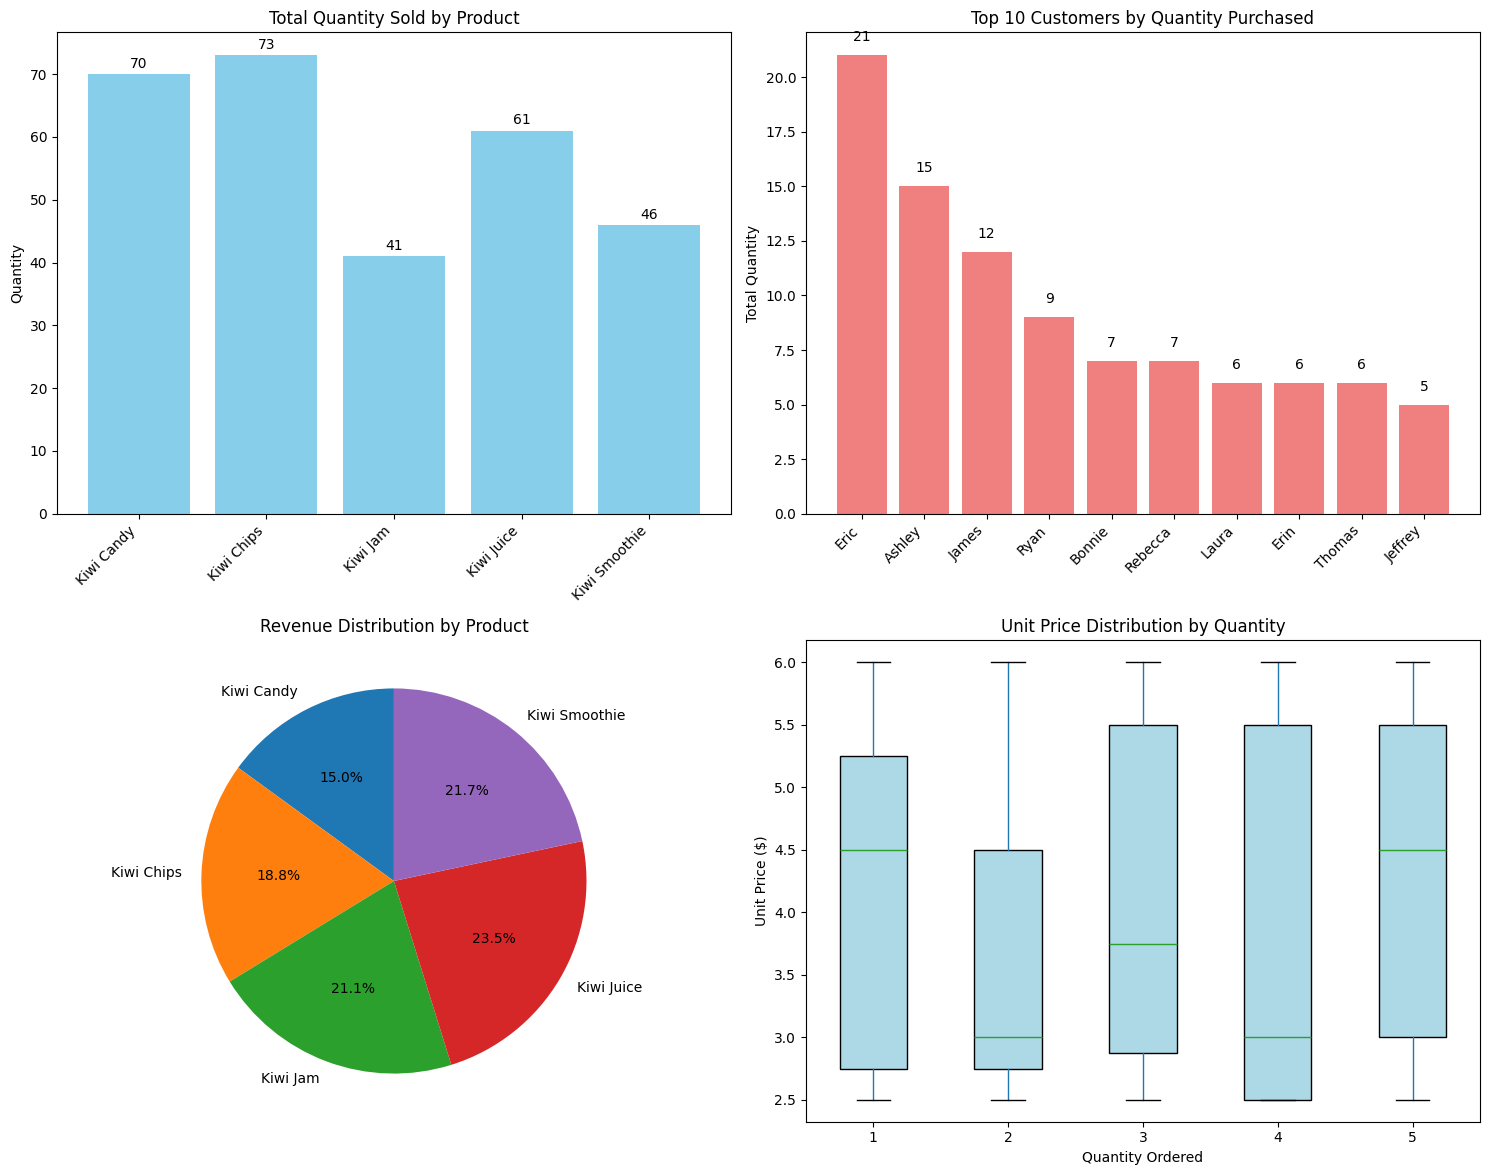

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute necessary aggregations
product_quantities = df.groupby('product')['quantity'].sum()
customer_quantities = df.groupby('customer_name')['quantity'].sum().sort_values(ascending=False).head(10)
product_revenue = df.groupby('product')['total_price'].sum()

# Create dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Orders Analysis Dashboard', fontsize=16)

# Total Quantity Sold by Product
ax1 = axes[0, 0]
bars1 = ax1.bar(product_quantities.index, product_quantities.values, color='skyblue')
ax1.set_title('Total Quantity Sold by Product')
ax1.set_ylabel('Quantity')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars1, product_quantities.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}', ha='center', va='bottom')

# Top 10 Customers by Quantity Purchased
ax2 = axes[0, 1]
bars2 = ax2.bar(customer_quantities.index, customer_quantities.values, color='lightcoral')
ax2.set_title('Top 10 Customers by Quantity Purchased')
ax2.set_ylabel('Total Quantity')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars2, customer_quantities.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}', ha='center', va='bottom')

# Revenue Distribution by Product
ax3 = axes[1, 0]
ax3.pie(product_revenue.values, labels=product_revenue.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Revenue Distribution by Product')

# Quantity vs Unit Price Boxplot
ax4 = axes[1, 1]
df.boxplot(column='unit_price', by='quantity', ax=ax4, grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax4.set_title('Unit Price Distribution by Quantity')
ax4.set_xlabel('Quantity Ordered')
ax4.set_ylabel('Unit Price ($)')
plt.suptitle('')  # Remove the automatic pandas title


plt.tight_layout()
plt.show()


## Summary Results

In [ ]:
print("ANALYSIS SUMMARY")
print("=" * 40)
print(f"Dataset shape: {df.shape}")
print(f"Total revenue: ${total_revenue:.2f}")
print(f"Product with highest quantity: {highest_qty_product} ({highest_qty_amount} units)")
print(f"Customer with highest spending: {highest_spending_customer} (${highest_spending_amount:.2f})")


ANALYSIS SUMMARY
Dataset shape: (100, 7)
Total revenue: $1167.50
Product with highest quantity: Kiwi Chips (73 units)
Customer with highest spending: Eric ($100.50)
